In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

In [13]:
# choose a binary classification problem
data = load_breast_cancer()
# develop predictors X and target y dataframes
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# build a RF model with default parameters
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test) 

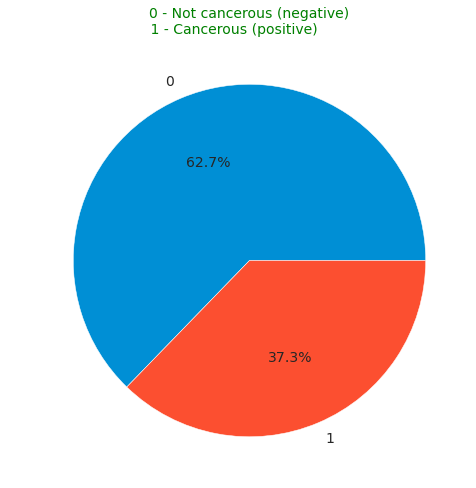

In [14]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)        ', size=14, c='green')
plt.tight_layout(); plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


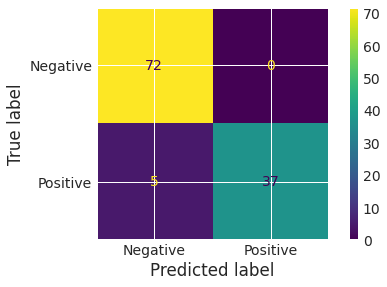

In [15]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])

In [16]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel() 

array([72,  0,  5, 37])

##Accuracy

Accuracy can also be defined as the ratio of the number of correctly classified cases to the total of cases under evaluation. The best value of accuracy is 1 and the worst value is 0.

In [17]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.956140350877193

##Precision

Precision can be defined with respect to either of the classes. The precision of negative class is intuitively the ability of the classifier not to label as positive a sample that is negative. The precision of positive class is intuitively the ability of the classifier not to label as negative a sample that is positive. The best value of precision is 1 and the worst value is 0.

In [18]:
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
precision_positive, precision_negative 

(1.0, 0.935064935064935)

##Recall

Recall can also be defined with respect to either of the classes. Recall of positive class is also termed sensitivity and is defined as the ratio of the True Positive to the number of actual positive cases. It can intuitively be expressed as the ability of the classifier to capture all the positive cases. It is also called the True Positive Rate (TPR).

In [19]:
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
recall_sensitivity, recall_specificity 

(0.8809523809523809, 1.0)

##F1-score

F1-score is considered one of the best metrics for classification models regardless of class imbalance. F1-score is the weighted average of recall and precision of the respective class. Its best value is 1 and the worst value is 0.

In [20]:
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
f1_positive, f1_negative

(0.9367088607594937, 0.9664429530201343)

In [21]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



##ROC and AUC score

ROC is the short form of Receiver Operating Curve, which helps determine the optimum threshold value for classification. The threshold value is the floating-point value between two classes forming a boundary between those two classes. Here in our model, any predicted output above the threshold is classified as class 1 and below it is classified as class 0.

ROC is realized by visualizing it in a plot. The area under ROC, famously known as AUC is used as a metric to evaluate the classification model. ROC is drawn by taking false positive rate in the x-axis and true positive rate in the y-axis. The best value of AUC is 1 and the worst value is 0. However, AUC of 0.5 is generally considered the bottom reference of a classification model

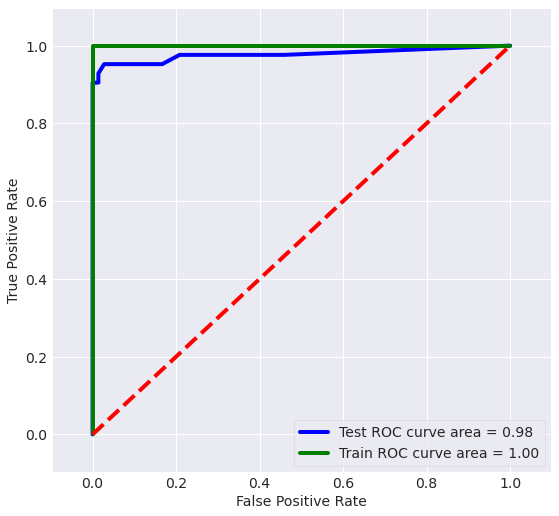

In [22]:
sns.set_style('darkgrid')
preds_train = model.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(model.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(model.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

In [23]:
# creating index
i = np.arange(len(tpr1))
# extracting roc values against different thresholds 
roc = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'tf':(tpr1-1+fpr1), 'thresholds':thresholds1}, index=i)
# top 5 best roc occurrences 
roc.iloc[(roc.tf-0).abs().argsort()[:5]] 

,fpr,tpr,tf,thresholds
16,0.027778,0.952381,-0.019841,0.28
17,0.083333,0.952381,0.035714,0.17
15,0.013889,0.928571,-0.057540,0.34
18,0.111111,0.952381,0.063492,0.16
14,0.013889,0.904762,-0.081349,0.41


##Precision-Recall Curve

To find the best threshold value based on the trade-off between precision and recall, precision_recall_curve is drawn.

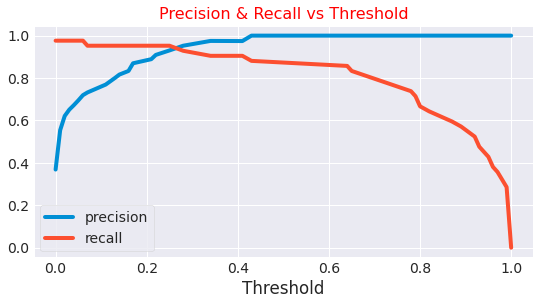

In [24]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


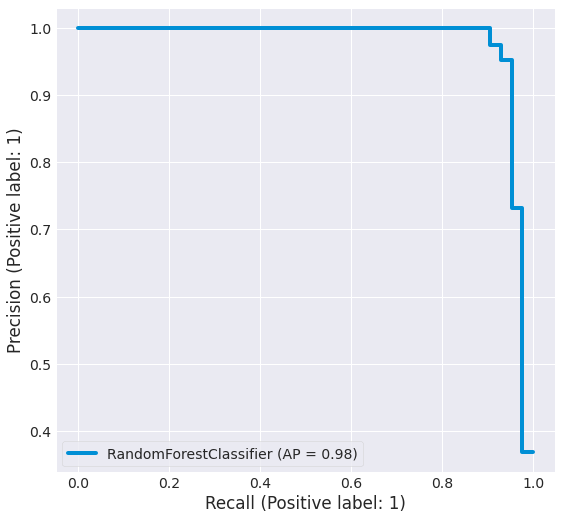

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(model, X_test, y_test, ax=ax) 

##Hamming Loss


Hamming loss is the fraction of targets that are misclassified. The best value of the hamming loss is 0 and the worst value is 1. It can be calculated as 

In [26]:
hamming_loss = metrics.hamming_loss(y_test, preds)
hamming_loss 

0.043859649122807015

##Jaccard Score

Jaccard score is defined as the ratio of the size of the intersection to the size of the union of label classes between predicted labels and ground truth labels. It is considered a similarity coefficient to compare the predicted classes and true classes. The value of 1 denotes the best classification and 0 denotes the worst. Jaccard loss is considered a poor choice if the class distribution is imbalanced.

In [27]:
jaccard = metrics.jaccard_score(y_test, preds)
jaccard 

0.8809523809523809

##Cross-entropy loss

In [28]:
# Entropy loss
cross_entropy_loss = metrics.log_loss(y_test, prob_test)
cross_entropy_loss

0.4163112449732295